# Unsupervised Algorithm, final project: Clustering NBA players based on their stats

## About this project

### 1-a Motivation:

#### Suppose you're a big sportswear company, like Nike or Adidas. Your goal is to sell products, and to target and segment your audience so that you can sell more products. A good way of doing that is to use some marketing, like sponsoring NBA players and make them wear your products, so that people would want to buy what those athletes are wearing. But exactly, how do you select those players ? Should you target the best players, and if so how do you measure the quality of a player ? Do you favor more his or her raw capabilities, or the number of points he or she scored, etc...

### 1-b Goal of this project:

#### Throughout this notebook, we'll see how we can leverage unsupervised ML techniques to cluster NBA players based on their statistics, like the number of games played, points scored, etc... Then, the marketing department will be able to use these clusters to better target their audience and reach more customers by using the top players as their vector of marketing

### 1-c About our data:

#### This dataset comes from Kaggle (https://www.kaggle.com/datasets/justinas/nba-players-data) and contains data from 1996-2021. It contains roughly 12000 rows and 22 features (~2mb), which should be useful to create a robust model. Features includes everything from the name of the player and their physical description (height, age, weight), the seasons they played as well as their draft number and performance metrics.

### DATA Description (from Kaggle original data set)

*   player_name: name of the player
*   team_abbreviation: Abbreviated name of the team the player played for
*   age: age of the player
*   player_height: height of the player (in cm)
*   player_weight: weight of the player (in kg)
*   college: name of the college the player attended
*   country: country the player was born in
*   draft_year: year the player was drafted
* draft_round: the draft round the player was picked
* draft_number: the number at which the player was picked in his draft round
* gp: games played throughout the season
* pts: average number of points scored
* reb: average number of rebounds grabbed
* ast: average number of assists distributed
* net_rating: team's point differential per 100 possessions while the player is on hte court
* oreb_pct: Percentage of available offensive rebounds the player grabbed while he was on the floor
* dreb_pct: Percentage of available defensive rebounds the player grabbed while he was on the floor
* usg_pct: Percentage of team plays used by the player while he was on the floor (FGA + Possession Ending FTA + TO) / POSS)
* ts_pct: Measure of the player's shooting efficiency that takes into account free throws, 2 and 3 point shots (PTS / (2*(FGA + 0.44 * FTA)))
* ast_pct: Percentage of teammate field goals the player assisted while he was on the floor
* season: NBA season






### 1-d Outline of this notebook

#### First, we will read the data and perform some basic EDA on it. Then, we'll visualize our data and do some feature engineering. Finally, we'll build our model and conclude by talking about what went wrong and what we learned throughout this process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### PART 1: EDA 

In [2]:
data = pd.read_csv('all_seasons.csv')

In [3]:
data.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [4]:
data.shape

(12305, 22)

In [5]:
data.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,6152.000000,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358
std,3552.291866,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3076.000000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000
50%,6152.000000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000
75%,9228.000000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000
max,12304.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

In [7]:
data.isnull().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [8]:
print(data['draft_round'].value_counts())
(data['draft_number']=='Undrafted').sum()

1            7071
2            2910
Undrafted    2274
3              20
4              12
0               6
6               5
7               5
8               2
Name: draft_round, dtype: int64


2277

### So far, we need to convert the object data types into float. There are no null values in this data set. Furthermore, the draft_round contains a value that will be dropped as it's not useful

In [9]:
data_2 = data[data['draft_round'] != 'Undrafted']
data_2 = data_2[data_2['draft_number']!='Undrafted']

In [10]:
data_2['draft_round'].value_counts()
(data_2['draft_number']=='Undrafted').sum()

0

In [11]:
data_2['draft_round'] = data_2['draft_round'].apply(lambda x: float(x))
data_2['draft_number'] = data_2['draft_number'].apply(lambda x: float(x))
data_2['gp'] = data_2['gp'].apply(lambda x: float(x))

In [12]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10028 entries, 0 to 12302
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10028 non-null  int64  
 1   player_name        10028 non-null  object 
 2   team_abbreviation  10028 non-null  object 
 3   age                10028 non-null  float64
 4   player_height      10028 non-null  float64
 5   player_weight      10028 non-null  float64
 6   college            10028 non-null  object 
 7   country            10028 non-null  object 
 8   draft_year         10028 non-null  object 
 9   draft_round        10028 non-null  float64
 10  draft_number       10028 non-null  float64
 11  gp                 10028 non-null  float64
 12  pts                10028 non-null  float64
 13  reb                10028 non-null  float64
 14  ast                10028 non-null  float64
 15  net_rating         10028 non-null  float64
 16  oreb_pct           100

In [13]:
final_data = data_2.drop(['Unnamed: 0', 'team_abbreviation', 'college', 
                          'country', 'draft_year'], axis=1)

### In order for our project to make some business sense, we will be only keeping the players who have played a game in the last 10 years. This will reduce our data set to contain a little bit north of 5000 rows, with 17 columns

In [14]:
seasons_to_keep = ['2009-10', '2010-11', '2011-12', '2012-13', 
                   '2013-14', '2014-15', '2015-16', '2016-17', 
                   '2017-18', '2018-19', '2019-20', '2020-21',
                   '2021-22']

final_data = final_data[final_data['season'].isin(seasons_to_keep)]

In [15]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5177 entries, 5784 to 12302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_name    5177 non-null   object 
 1   age            5177 non-null   float64
 2   player_height  5177 non-null   float64
 3   player_weight  5177 non-null   float64
 4   draft_round    5177 non-null   float64
 5   draft_number   5177 non-null   float64
 6   gp             5177 non-null   float64
 7   pts            5177 non-null   float64
 8   reb            5177 non-null   float64
 9   ast            5177 non-null   float64
 10  net_rating     5177 non-null   float64
 11  oreb_pct       5177 non-null   float64
 12  dreb_pct       5177 non-null   float64
 13  usg_pct        5177 non-null   float64
 14  ts_pct         5177 non-null   float64
 15  ast_pct        5177 non-null   float64
 16  season         5177 non-null   object 
dtypes: float64(15), object(2)
memory usage: 728.0+ K

In [16]:
final_data.head()

,player_name,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
5784,Rasho Nesterovic,34.0,213.36,115.665960,1.0,17.0,42.0,3.9,2.1,0.6,-10.4,0.117,0.165,0.184,0.539,0.091,2009-10
5785,Rasheed Wallace,35.0,210.82,104.326160,1.0,4.0,79.0,9.0,4.1,1.0,1.9,0.029,0.203,0.204,0.504,0.076,2009-10
5786,Rashard Lewis,30.0,208.28,104.326160,2.0,32.0,72.0,14.1,4.4,1.5,8.7,0.032,0.118,0.196,0.573,0.075,2009-10
5787,Randy Foye,26.0,193.04,96.615096,1.0,7.0,70.0,10.1,1.9,3.3,-8.2,0.011,0.080,0.212,0.516,0.234,2009-10
5789,Paul Millsap,25.0,203.20,113.398000,2.0,47.0,82.0,11.6,6.8,1.6,6.6,0.100,0.189,0.187,0.573,0.090,2009-10


In [17]:
final_data.shape

(5177, 17)

## PART 2: VISUALIZATION

In [18]:
matplotlib.rcParams['figure.figsize'] = (20, 10) # Set the default figure size so we don't have to set it everytime 
sns.set_theme(style='darkgrid')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


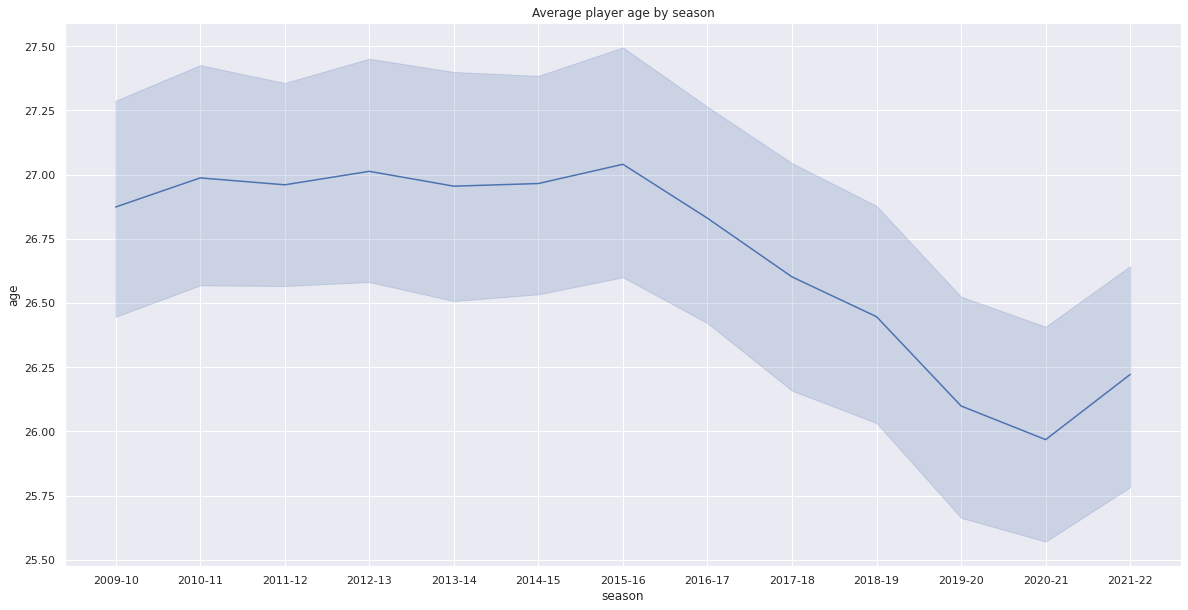

In [19]:
sns.lineplot('season','age', data=final_data)
plt.title('Average player age by season')
plt.show()

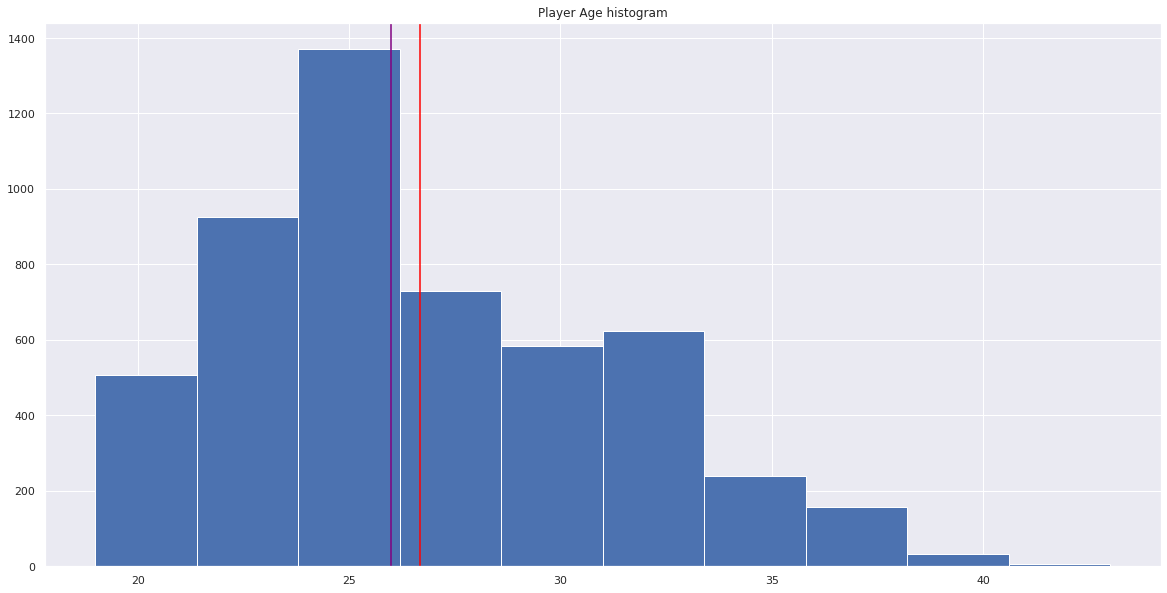

In [20]:
plt.hist(final_data['age'])
plt.axvline(final_data['age'].mean(), color='red')
plt.axvline(final_data['age'].median(), color='purple')
plt.title('Player Age histogram')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


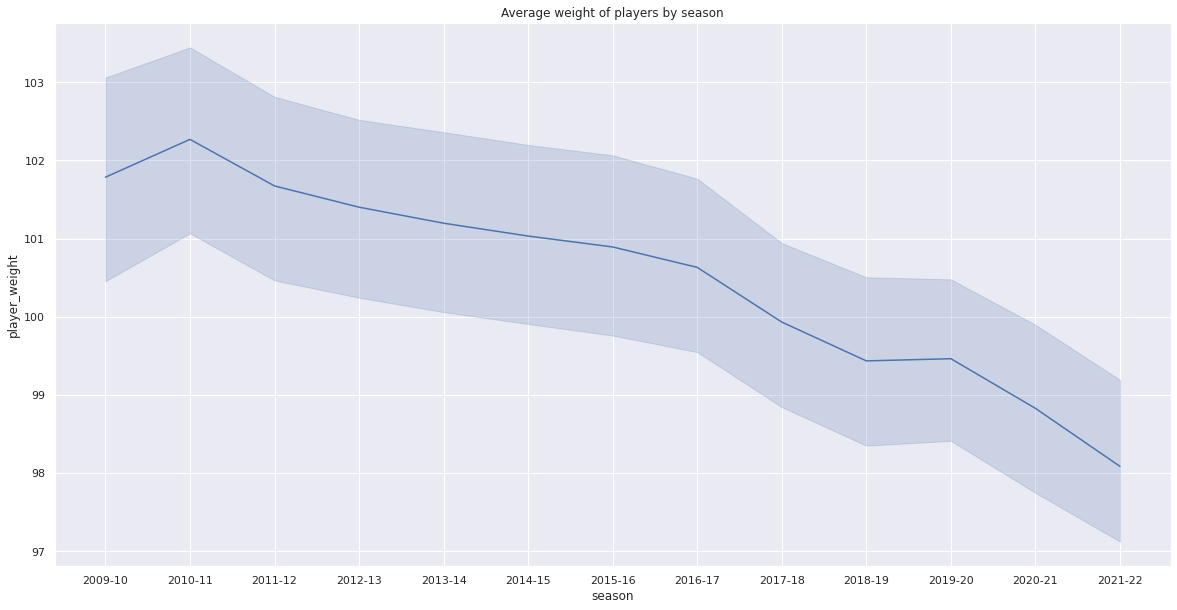

In [21]:
sns.lineplot('season', 'player_weight', data=final_data)
plt.title('Average weight of players by season')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


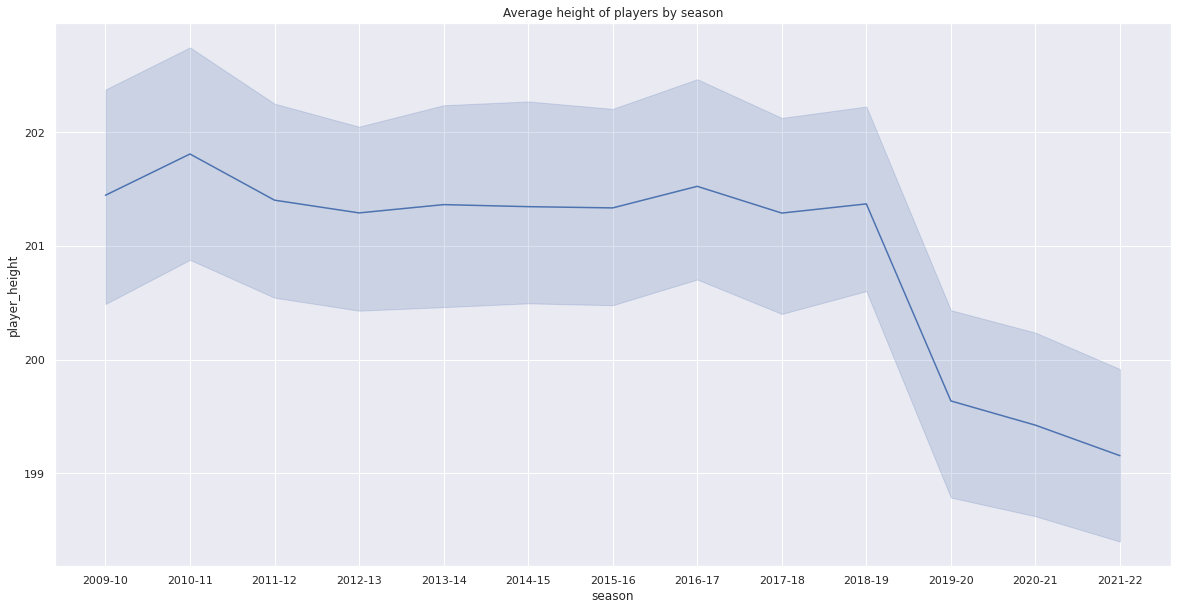

In [22]:
sns.lineplot('season', 'player_height', data=final_data)
plt.title('Average height of players by season')
plt.show()

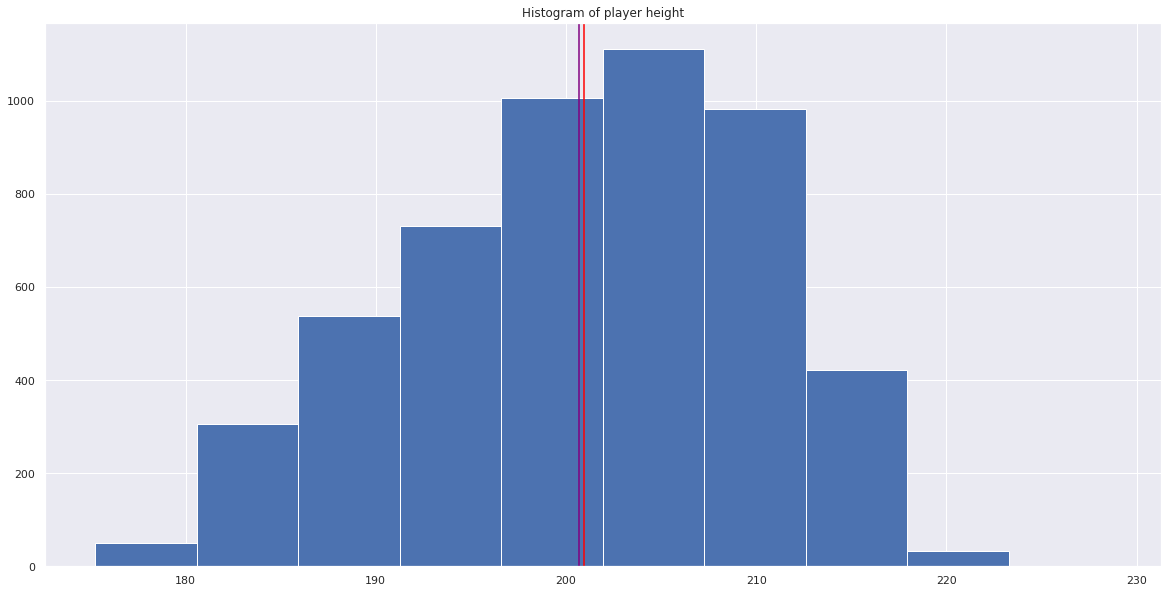

In [23]:
plt.hist(final_data['player_height'])
plt.axvline(final_data['player_height'].mean(), color='red')
plt.axvline(final_data['player_height'].median(), color='purple')
plt.title('Histogram of player height')
plt.show()

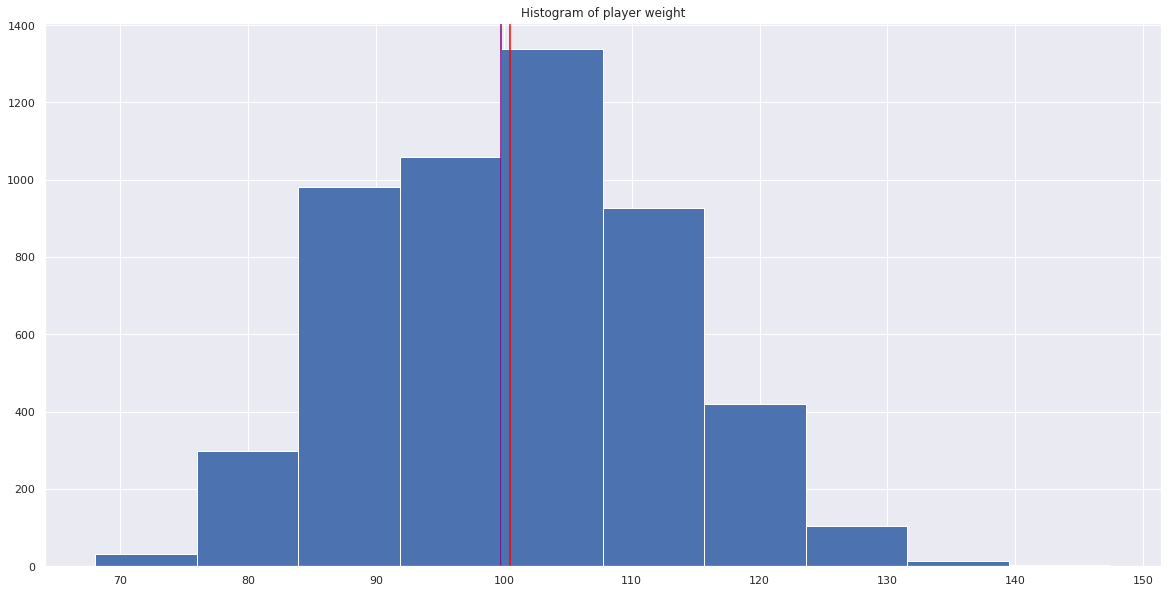

In [24]:
plt.hist(final_data['player_weight'])
plt.axvline(final_data['player_weight'].mean(), color='red')
plt.axvline(final_data['player_weight'].median(), color='purple')
plt.title('Histogram of player weight')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


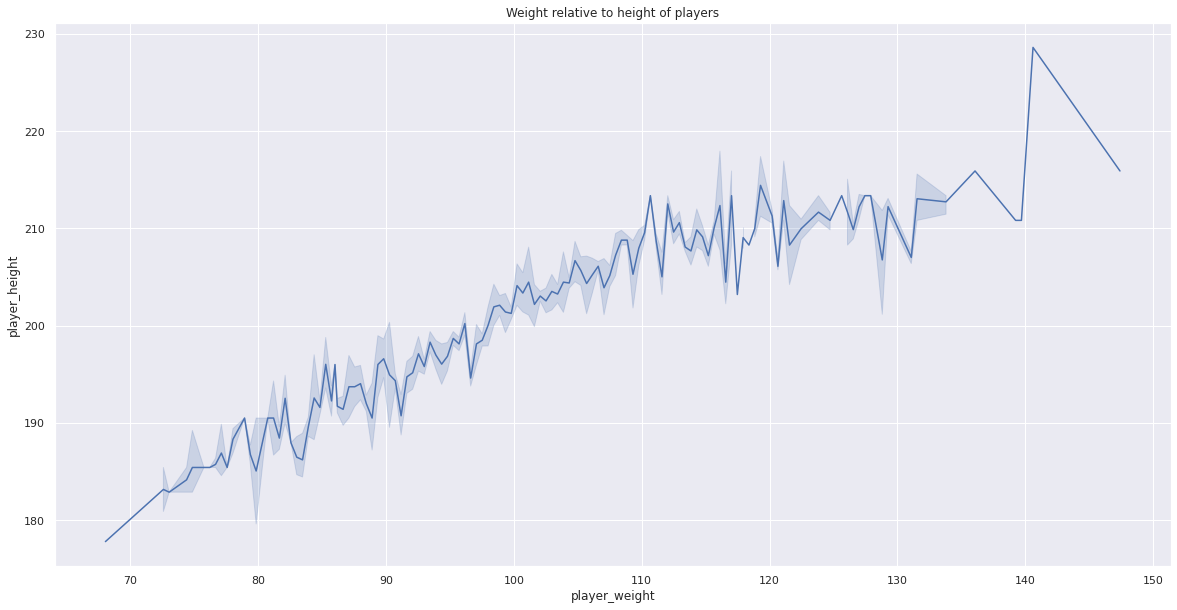

In [25]:
sns.lineplot('player_weight', 'player_height', data=final_data)
plt.title('Weight relative to height of players')
plt.show()

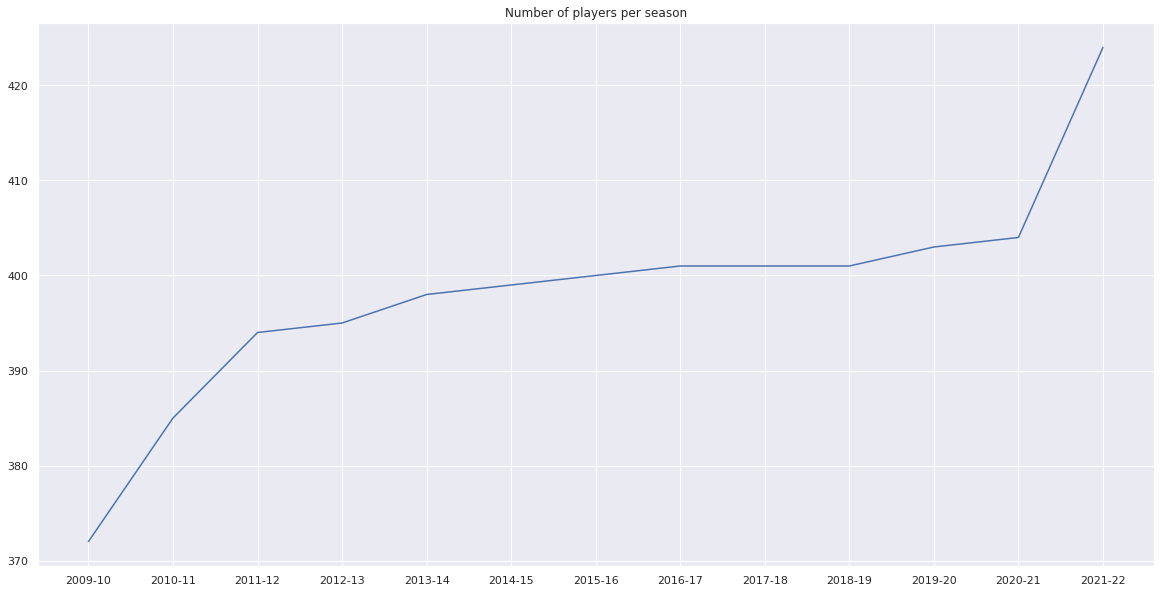

In [26]:
plt.plot(final_data['season'].unique(), 
         final_data['season'].value_counts()[::-1])
plt.title('Number of players per season')
plt.show()

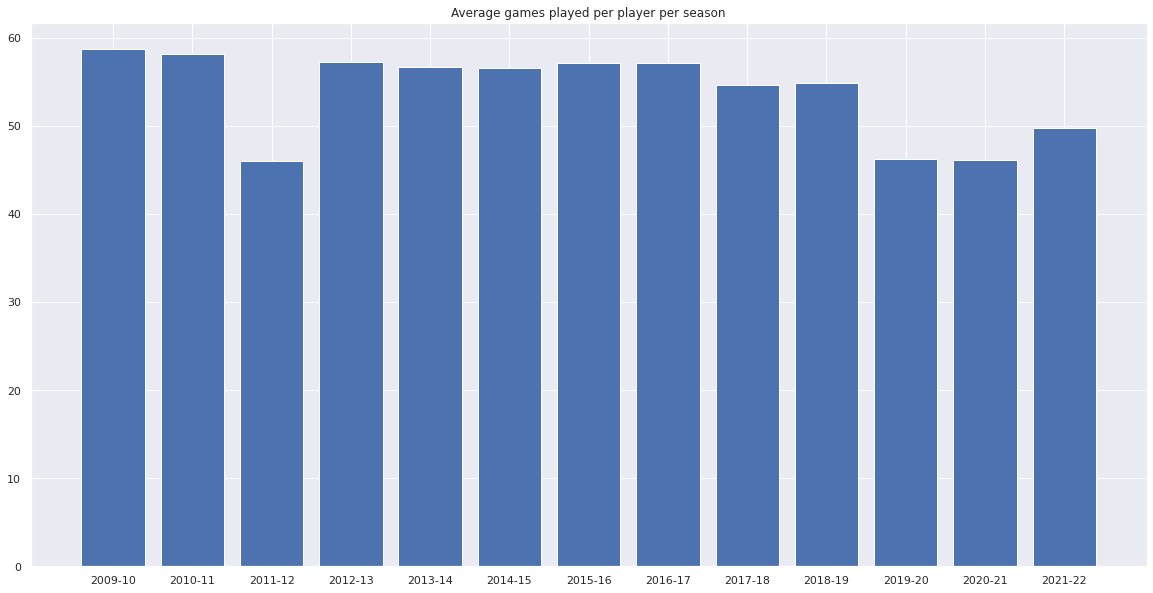

In [27]:
plt.bar(final_data['season'].unique(), final_data.groupby('season')['gp'].mean())
plt.title('Average games played per player per season')
plt.show()

Text(0.5, 1.0, 'The maximum average points a player scored by game per season')

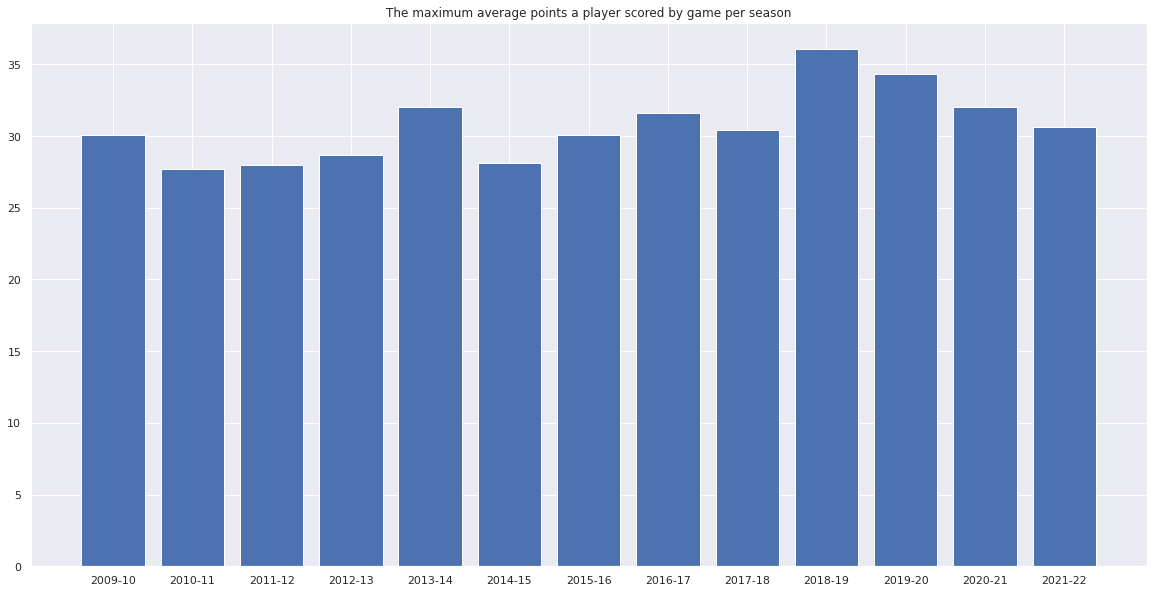

In [28]:
plt.bar(final_data['season'].unique(),
            final_data.groupby('season')['pts'].max())
plt.title('The maximum average points a player scored by game per season')

Text(0.5, 1.0, 'Average points scored by player per season')

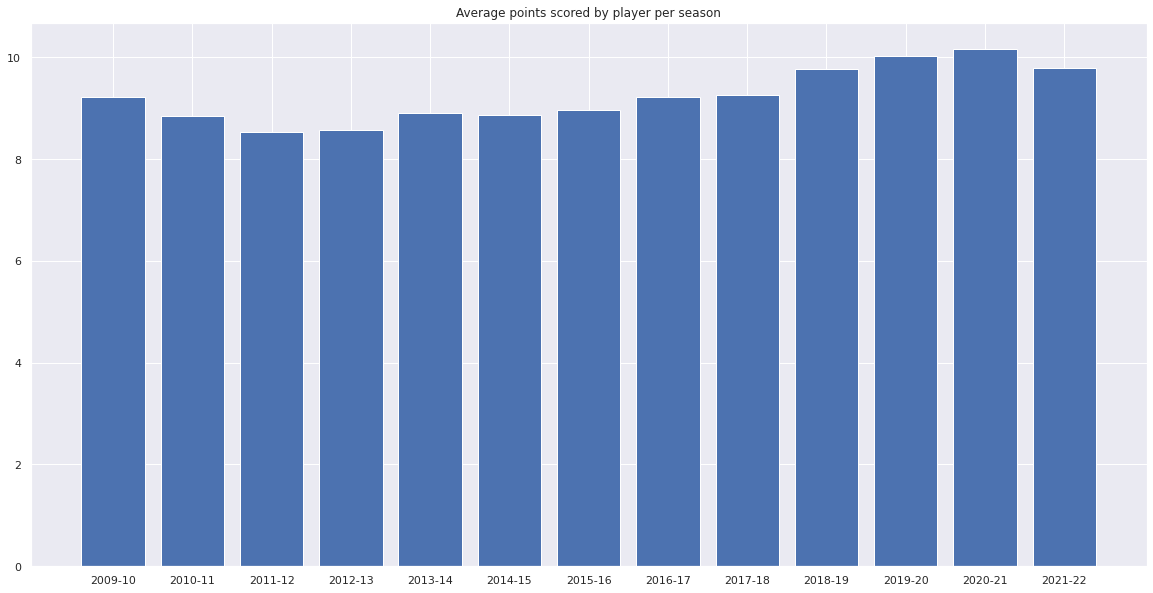

In [29]:
plt.bar(final_data['season'].unique(),
        final_data.groupby('season')['pts'].mean())
plt.title('Average points scored by player per season')

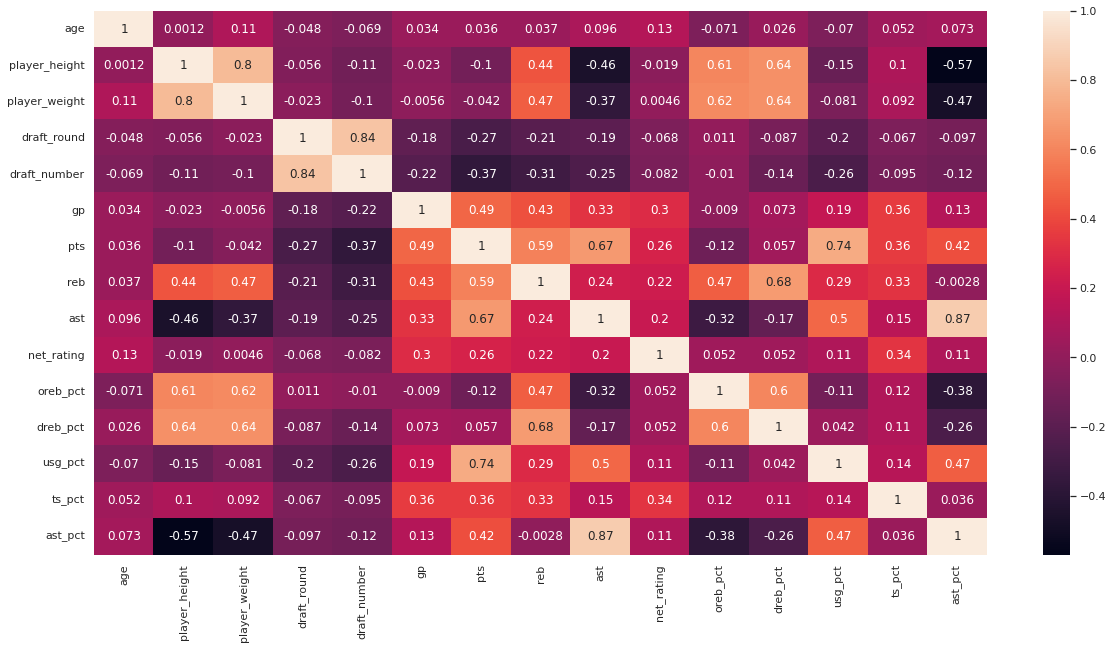

In [30]:
sns.heatmap(final_data.corr(), annot=True)
plt.show()

### PART 3: FEATURE ENGINEERING/EXTRACTION WITH PCA AND MODEL BUILDING

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Why use PCA ?

#### For this project, we are going to run some Principal Components Analysis. This will make our model more robust by selecting the best features, i.e the features that explain most of the variance in our data. This will also help us reduce the training time since we are going to train on less features. 

In [32]:
X = final_data.copy()

In [33]:
X.drop(['player_name', 'season'], axis=1,inplace=True)

In [34]:
X.head()

,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
5784,34.0,213.36,115.665960,1.0,17.0,42.0,3.9,2.1,0.6,-10.4,0.117,0.165,0.184,0.539,0.091
5785,35.0,210.82,104.326160,1.0,4.0,79.0,9.0,4.1,1.0,1.9,0.029,0.203,0.204,0.504,0.076
5786,30.0,208.28,104.326160,2.0,32.0,72.0,14.1,4.4,1.5,8.7,0.032,0.118,0.196,0.573,0.075
5787,26.0,193.04,96.615096,1.0,7.0,70.0,10.1,1.9,3.3,-8.2,0.011,0.080,0.212,0.516,0.234
5789,25.0,203.20,113.398000,2.0,47.0,82.0,11.6,6.8,1.6,6.6,0.100,0.189,0.187,0.573,0.090


In [35]:
X.shape

(5177, 15)

### For PCA to work, we first need to scale our data. We are going to go with standard scaling, although other scaling methods could work.


In [36]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [37]:
print(X_std.shape, X_std)

(5177, 15) [[ 1.6634368   1.43628584  1.30210725 ... -0.07276622  0.10743721
  -0.4699828 ]
 [ 1.89083612  1.14256463  0.3294775  ...  0.30686768 -0.2849257
  -0.63557122]
 [ 0.75383951  0.84884343  0.3294775  ...  0.15501412  0.48858976
  -0.64661045]
 ...
 [ 1.20863815  0.55512222  0.91305535 ...  0.17399582  0.19712017
  -0.19400211]
 [-0.61055642 -0.91348381 -0.48753148 ...  1.46475108 -0.1391909
   3.47102148]
 [ 0.29904087 -0.91348381 -0.0595744  ... -0.16767469  0.11864758
   1.23005826]]


In [38]:
pca = PCA(svd_solver='randomized')

In [39]:
X_std_pca = pca.fit_transform(X_std)

In [40]:
print(X_std_pca.shape, X_std_pca)

(5177, 15) [[-2.3736371  -0.48203878  1.03116058 ... -0.1033017  -0.19407522
   0.06612367]
 [-0.6378172  -1.41784222  0.97639007 ...  0.49149874 -0.00632414
  -0.04108695]
 [-0.27838977 -0.3907371  -1.88473545 ...  0.52041799  0.05735668
   0.08496385]
 ...
 [-0.596621    0.11961528  0.97162196 ... -0.14405954  0.20512955
  -0.12618218]
 [ 3.58502741  0.1145777   1.38302864 ...  0.37635437  0.65784277
   0.20901788]
 [ 2.70782679 -0.64877345  0.32499354 ...  0.12884478 -0.30570928
  -0.39588063]]


### Let's take a look at the explained variance ratio. This ratio indicates to us how much variation is each principal components responsible of. For instance, the 1st Principal components explain 26% of the total variance in our dataset, the second 24% and so on.

In [41]:
var_explained = pca.explained_variance_ratio_
print(var_explained)

[0.26769191 0.24742078 0.10301815 0.08190378 0.0685755  0.04756085
 0.04478908 0.03971109 0.02556159 0.02416772 0.01888874 0.01211609
 0.0098032  0.00617838 0.00261314]


In [42]:
print(pca.components_)

[[ 2.33467921e-02 -3.79473856e-01 -3.50317470e-01 -1.06737076e-01
  -1.09887405e-01  1.48266389e-01  2.93510943e-01 -5.13348949e-02
   4.14320481e-01  9.16972585e-02 -3.23868780e-01 -2.65041047e-01
   2.67215175e-01  5.50048655e-02  4.10926029e-01]
 [-4.68380725e-02 -2.43399221e-01 -2.64341441e-01  2.34443209e-01
   2.84159843e-01 -2.67719453e-01 -3.49734004e-01 -4.57908428e-01
  -1.58726308e-01 -1.78249190e-01 -2.29762340e-01 -3.26923103e-01
  -2.34521806e-01 -2.38379522e-01 -2.91022018e-02]
 [-8.05657040e-03  4.05191059e-02 -2.59326250e-03 -6.22317903e-01
  -5.86531896e-01 -1.89839674e-01 -1.03009771e-01 -1.26259918e-01
  -7.81904134e-02 -2.91362594e-01 -8.83294479e-02 -3.64427010e-02
  -1.17642371e-02 -3.17851923e-01 -5.55998563e-02]
 [-4.15799338e-01  3.94356321e-02  6.68365964e-02  2.12755400e-01
   1.64506788e-01 -2.82238559e-01  1.43232767e-01  1.36299025e-01
   1.46468210e-01 -4.67492116e-01  1.29990585e-01  2.03274900e-01
   4.02100736e-01 -3.55479734e-01  2.09138037e-01]
 [ 8

### Before doing any clustering, we first need to select how many features we are going to keep. To do that, we will plot the explained variance ratio

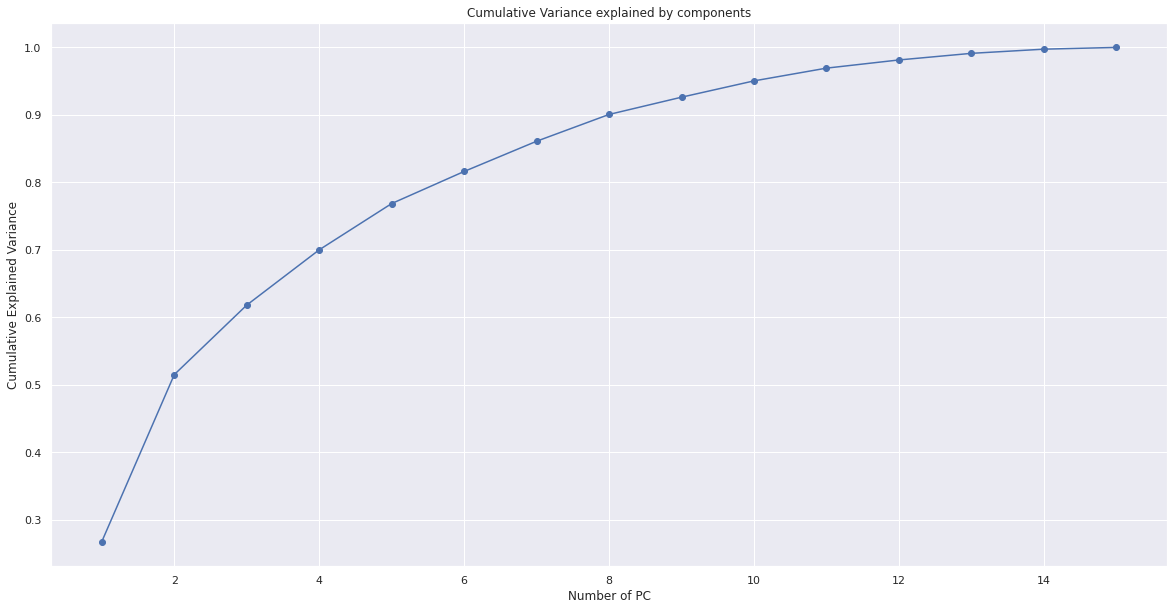

In [43]:
plt.plot(range(1,16), var_explained.cumsum(), marker='o')
plt.xlabel('Number of PC')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance explained by components')
plt.show()

### Based on the graph above, we are going to select the 6 Principal components since they explained together a little over 0.8 of the cumulative variance, i.e those 6 features gives us the best information regarding our players.

In [44]:
pca = PCA(n_components=6, svd_solver='randomized')

In [45]:
X_pca = pca.fit_transform(X_std)

### Next, we need to decide how many clusters we need. We are going to test values from 2 to 10, as this is what makes the most sense. If you are a business, you want to cluster groups and segment them to enhance your marketing, but you shouldn't make it specific to the point of having one cluster for one observation. Think of it like this: the clusters will tell us the range of our players, from worst to best. Then, depending on our marketing strategy, we can just target the cluster we want to advertise with.

In [46]:
from sklearn.cluster import KMeans

In [47]:
wcss_values = []

for i in range(2,11):
  kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=7777777) # set the seed so that we have reproducible results
  kmeans_pca.fit(X_pca)
  wcss_values.append(kmeans_pca.inertia_)

In [48]:
wcss_values

[49162.53340087823,
 39728.62581319543,
 35122.021859452754,
 31897.476062938364,
 29363.390259514217,
 27072.17476056439,
 25697.266038817193,
 24437.721799598316,
 23227.642328645194]

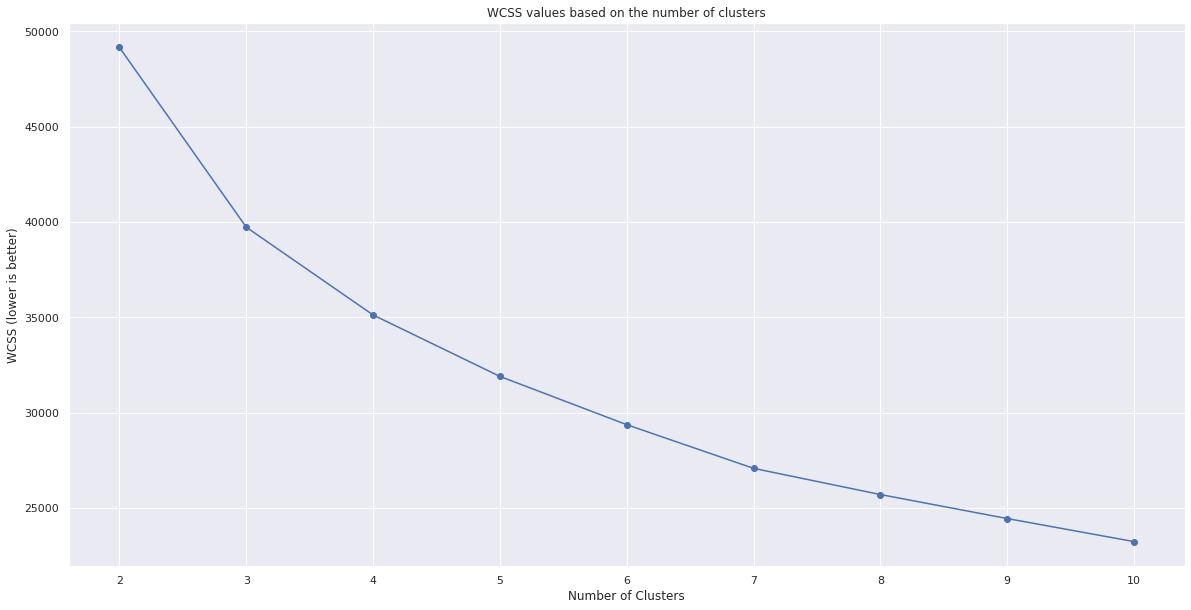

In [49]:
plt.plot(range(2,11), wcss_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (lower is better)')
plt.title('WCSS values based on the number of clusters')
plt.show()

### To select the optimal number of clusters, we need to select a number of cluster that minimizes the WCSS (Within Cluster Sum of Square), i.e minimizing this means that we increase the distance between the clusters.
### To select the appropriate number of clusters, we can use the elbow methods. In this case, the elbow isn't clearly defined, so we are going to choose 6 clusters. Now, we only need to build this model with our optimal parameters

In [50]:
final_model = KMeans(n_clusters=6, init='k-means++', random_state=7777777)
final_model.fit(X_pca)

KMeans(n_clusters=6, random_state=7777777)

## PART 4: RESULT ANALYSIS AND DISCUSSION

### Before plotting our resulting clusters, we are going to create a new dataframe which contains our principal components, as well as the cluster labels

In [51]:
result_data = pd.concat([final_data.reset_index(drop=True), pd.DataFrame(X_pca)], axis =1) # Merge original Dataframe with our PCA results

In [52]:
result_data.head()

,player_name,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,...,usg_pct,ts_pct,ast_pct,season,0,1,2,3,4,5
0,Rasho Nesterovic,34.0,213.36,115.665960,1.0,17.0,42.0,3.9,2.1,0.6,...,0.184,0.539,0.091,2009-10,-2.373637,-0.482039,1.031161,-0.444585,1.479293,0.187115
1,Rasheed Wallace,35.0,210.82,104.326160,1.0,4.0,79.0,9.0,4.1,1.0,...,0.204,0.504,0.076,2009-10,-0.637817,-1.417842,0.976390,-1.370078,1.172054,0.835010
2,Rashard Lewis,30.0,208.28,104.326160,2.0,32.0,72.0,14.1,4.4,1.5,...,0.196,0.573,0.075,2009-10,-0.278390,-0.390737,-1.884735,-0.788414,0.227517,0.653840
3,Randy Foye,26.0,193.04,96.615096,1.0,7.0,70.0,10.1,1.9,3.3,...,0.212,0.516,0.234,2009-10,2.217491,0.467965,1.106667,-0.081263,-0.256454,0.548951
4,Paul Millsap,25.0,203.20,113.398000,2.0,47.0,82.0,11.6,6.8,1.6,...,0.187,0.573,0.090,2009-10,-1.394877,-1.246973,-2.777642,0.340597,-0.358293,0.213397


In [53]:
rename_list = ['first_component', 'second_component', 'third_component', 
               'fourth_component', 'fifth_component', 'sixth_component']

result_data.columns.values[-6:] = rename_list

In [54]:
result_data.head()

,player_name,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,...,usg_pct,ts_pct,ast_pct,season,first_component,second_component,third_component,fourth_component,fifth_component,sixth_component
0,Rasho Nesterovic,34.0,213.36,115.665960,1.0,17.0,42.0,3.9,2.1,0.6,...,0.184,0.539,0.091,2009-10,-2.373637,-0.482039,1.031161,-0.444585,1.479293,0.187115
1,Rasheed Wallace,35.0,210.82,104.326160,1.0,4.0,79.0,9.0,4.1,1.0,...,0.204,0.504,0.076,2009-10,-0.637817,-1.417842,0.976390,-1.370078,1.172054,0.835010
2,Rashard Lewis,30.0,208.28,104.326160,2.0,32.0,72.0,14.1,4.4,1.5,...,0.196,0.573,0.075,2009-10,-0.278390,-0.390737,-1.884735,-0.788414,0.227517,0.653840
3,Randy Foye,26.0,193.04,96.615096,1.0,7.0,70.0,10.1,1.9,3.3,...,0.212,0.516,0.234,2009-10,2.217491,0.467965,1.106667,-0.081263,-0.256454,0.548951
4,Paul Millsap,25.0,203.20,113.398000,2.0,47.0,82.0,11.6,6.8,1.6,...,0.187,0.573,0.090,2009-10,-1.394877,-1.246973,-2.777642,0.340597,-0.358293,0.213397


In [55]:
result_data['Cluster_label'] = final_model.labels_ # Add the labels to our final dataframe

In [56]:
result_data.head()

,player_name,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,...,ts_pct,ast_pct,season,first_component,second_component,third_component,fourth_component,fifth_component,sixth_component,Cluster_label
0,Rasho Nesterovic,34.0,213.36,115.665960,1.0,17.0,42.0,3.9,2.1,0.6,...,0.539,0.091,2009-10,-2.373637,-0.482039,1.031161,-0.444585,1.479293,0.187115,3
1,Rasheed Wallace,35.0,210.82,104.326160,1.0,4.0,79.0,9.0,4.1,1.0,...,0.504,0.076,2009-10,-0.637817,-1.417842,0.976390,-1.370078,1.172054,0.835010,3
2,Rashard Lewis,30.0,208.28,104.326160,2.0,32.0,72.0,14.1,4.4,1.5,...,0.573,0.075,2009-10,-0.278390,-0.390737,-1.884735,-0.788414,0.227517,0.653840,0
3,Randy Foye,26.0,193.04,96.615096,1.0,7.0,70.0,10.1,1.9,3.3,...,0.516,0.234,2009-10,2.217491,0.467965,1.106667,-0.081263,-0.256454,0.548951,1
4,Paul Millsap,25.0,203.20,113.398000,2.0,47.0,82.0,11.6,6.8,1.6,...,0.573,0.090,2009-10,-1.394877,-1.246973,-2.777642,0.340597,-0.358293,0.213397,2


### Let's plot the resulting clusters with respect to the first three components (you can interact with the graph if you wish)

In [57]:
import plotly.express as px

In [58]:
x = result_data['first_component']
y = result_data['second_component']
z = result_data['third_component']

In [59]:
fig = px.scatter_3d(result_data, x=x, y=y, z=z, 
                    color = 'Cluster_label', 
                    hover_name=result_data['player_name'])
fig.show()

### CONCLUSION

#### Throughout this project, we were able to acquire a dataset, clean and wrangle it; then we did some visualizations were we learned some interesting facts about our players and the matches throughout the seasons. Then, we ran some PCA to find which components we should use in our model. Finally, we build an optimized K-Means clustering model with 6 clusters, based on the WCSS score. we visualized the clusters and we are now able to see where the players belong with respect to their performance.

#### Now, thanks to this project, Marketing department will be able to target more accurately their ad campaigns to reach the desired audience. 


#### I think overall this project was a success. Perhaps we could have increased the performance of our model with better data, but as it stands, our model is already quite good. We can see on the plot above that the clusters are clearly defined and don't contain that much of an overlap; although they might be too close between each other. 

#### For the next project, we may want to try different clustering methods. Perhaps that DBSCAN or Agglomerative clustering will yield better results; or we may want to use another scaling method (like min-max scaling for instance)